In [1]:
import pandas as pd

dim_time = pd.read_csv(r"powerbi_parquet\dim_time.csv", dtype={"date_key": "Int64"})
fact_fire = pd.read_csv(r"powerbi_parquet\fact_incident_fire.csv", dtype={"incident_date_key": "Int64"})

In [2]:
(
    dim_time["date_key"].isna().sum(),
    dim_time["date_key"].duplicated().sum(),
    fact_fire["incident_date_key"].isna().sum(),
)

(np.int64(0), np.int64(0), np.int64(0))

In [3]:
dim_keys = set(dim_time["date_key"].dropna())
unmatched = fact_fire.loc[
    fact_fire["incident_date_key"].notna()
    & ~fact_fire["incident_date_key"].isin(dim_keys),
    "incident_date_key"
]

len(unmatched), unmatched.unique()[:10]


(0,
 <IntegerArray>
 []
 Length: 0, dtype: Int64)

In [4]:
(
    dim_time["year"].isna().sum(),
    ((dim_time["date_key"] // 10000) != dim_time["year"]).sum(),
    sorted((fact_fire["incident_date_key"] // 10000).dropna().unique())[:10]
)


(np.int64(0),
 np.int64(0),
 [np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)])

In [5]:
YEAR = 2022

dim = dim_time.copy()
fact = fact_fire.copy()

df = fact.merge(dim[["date_key","year","month","day"]], left_on="incident_date_key", right_on="date_key", how="left")
df = df[df["year"] == YEAR]

hm = df.pivot_table(index="month", columns="day", values="incident_date_key", aggfunc="count", fill_value=0).sort_index()
hm

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,1725,1610,1672,1800,1809,1586,1662,1720,1644,1732,...,1833,1679,1650,1781,1538,1660,1615,1677,1787,2013
2,1879,1973,1887,1900,1649,1535,1834,1688,1630,1740,...,1524,1600,1491,1691,1575,1500,1500,0,0,0
3,1591,1540,1636,1662,1549,1619,1831,1683,1528,1608,...,1584,1573,1573,1681,1486,1469,1523,1497,1558,1666
4,1715,1680,1491,1614,1575,1528,1571,1762,1632,1526,...,1716,1623,1492,1546,1565,1619,1737,1874,1692,0
5,1689,1607,1602,1611,1792,1678,1568,1551,1802,1729,...,1984,1917,1631,1805,1670,1842,1778,1852,1902,2107
6,1848,1847,1949,1929,1796,1857,1784,1873,1883,1928,...,1666,1860,1912,2079,2016,1904,1847,1895,1804,0
7,1997,2005,1801,2132,2002,1877,1772,1769,1925,1796,...,2073,2122,2068,2042,1722,1868,1865,1897,1915,1823
8,1816,1981,1913,2006,1992,2062,1907,2070,2228,1937,...,1746,1691,1839,1824,1908,1869,1668,1862,1802,1804
9,1733,1776,1867,1758,1755,1704,1661,1845,1860,1893,...,1755,1865,1875,1792,1714,1725,1821,1775,1910,0


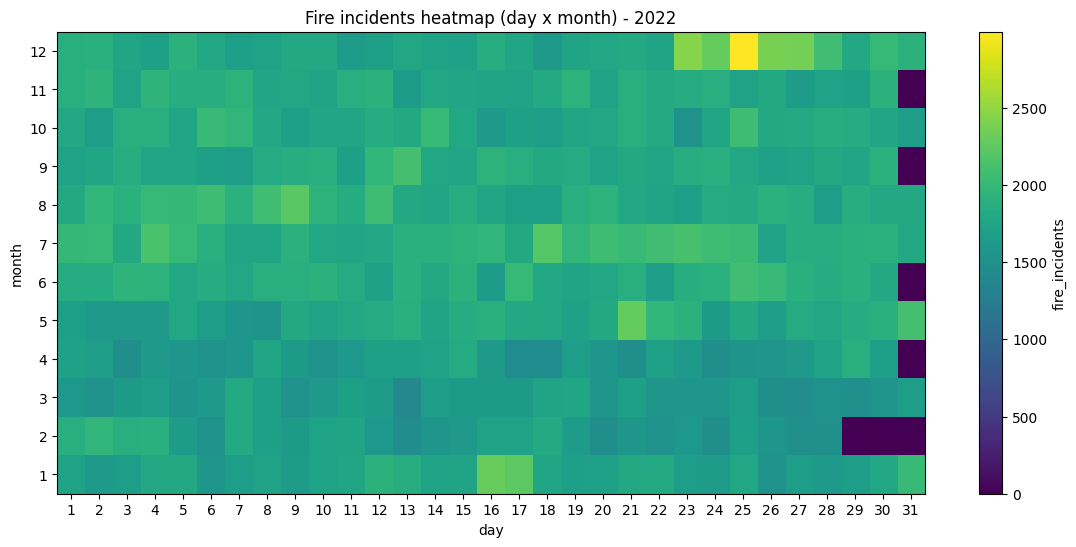

In [7]:
import matplotlib.pyplot as plt

Z = hm.to_numpy(dtype=float)

plt.figure(figsize=(14,6))
plt.imshow(Z, aspect="auto", origin="lower")
plt.colorbar(label="fire_incidents")
plt.xticks(range(len(hm.columns)), hm.columns)
plt.yticks(range(len(hm.index)), hm.index)
plt.xlabel("day")
plt.ylabel("month")
plt.title(f"Fire incidents heatmap (day x month) - {YEAR}")
plt.show()
